## Travis Williams - trwi4612


### Coding SIR Plot

In [31]:
import matplotlib.pyplot as plt

def SIRPLOT(trans_rate, rec_days, s_start, i_start, r_start, time):
    #Initializations
    t_initial, t_final = 0, time #start and end number of days
    t = t_initial #current day
    s, i, r = s_start, i_start, r_start #initial proportions for susceptible, infected, recovered, and death
    num_steps = t_final * 10 #10 steps for each day.
    a, b = trans_rate, rec_days #a (transmission coefficient/chance of infection) and b (recovery coefficient/days to recover).
    delta_t = (t_final - t_initial) / num_steps #time delta.

    #initialize lists for x and y axis to plot for SIR.
    x_axis = [t]
    s_y_axis = [s] 
    i_y_axis = [i]
    r_y_axis = [r]

    #loop through SIR calculations 10 times for each day that we're plotting.
    for k in range(num_steps):
        #calculate rate of change for SIR per step.
        s_prime = -a * s * i 
        i_prime = a * s * i - i / b
        r_prime = (i / b) 

        #calculate deltas for SIR per step.
        delta_s = s_prime * delta_t
        delta_i = i_prime * delta_t
        delta_r = r_prime * delta_t 

        #append deltas to x_axis(day) and y_axis for SIR.
        x_axis.append(t + delta_t)
        s_y_axis.append(s + delta_s)
        i_y_axis.append(i + delta_i)
        r_y_axis.append(r + delta_r)

        #set new initial values for next iteration.
        t = t + delta_t
        s = s + delta_s
        i = i + delta_i
        r = r + delta_r

    fig, ax = plt.subplots()

    #plot SIR with x_axis and y_axis for each.
    susceptible, = ax.plot(x_axis, s_y_axis, label = 'Susceptible')
    infected, = ax.plot(x_axis, i_y_axis, label = "Infected")
    recovered, = ax.plot(x_axis, r_y_axis, label = "Recovered")

    #legend for SIR.
    ax.legend(handles = [susceptible, infected, recovered])
    #x and y axes labels.

    ax.set_xlabel('Number of Days')
    ax.set_ylabel('Population')
    
    return

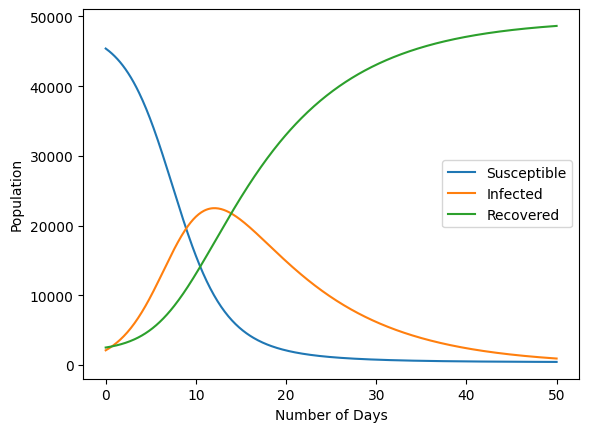

In [32]:
SIRPLOT(0.00001, 10, 45400, 2100, 2500, 50)

The timesteps really need to be greater than the total number of days that are being graphed, in order for the functions S, I, and R to be smooth.  Even at 10 steps above the number of days, the graph for the infected population doesn't appear to be entirely smooth.  I have my calculations set to 10 steps per day in the code above.  With 10 steps per day, the rate of change for the susceptible, infected, and recovered populations is analyzed and graphed a total of 500 times across the 50 day period of time that is graphed.  This may be overkill, but it does get the job done.  The timesteps control the number of times that the rate equations are applied to the data.  More frequent analysis results in greater accuracy when the data is graphed.  

### How bad is your epidemic

#### APLOT

In [4]:
import matplotlib.pyplot as plt

def APLOT(trans_rate, rec_days, s_start, i_start, r_start, time):
    #Initializations
    t_initial, t_final = 0, time #start and end number of days
    t = t_initial #current day
    s, i, r = s_start, i_start, r_start #initial proportions for susceptible, infected, recovered, and death
    num_steps = t_final * 10 #10 steps for each day.
    a, b = trans_rate, rec_days #a (transmission coefficient/chance of infection) and b (recovery coefficient/days to recover).
    delta_t = (t_final - t_initial) / num_steps #time delta.

    #initialize lists for x and y axis to plot for SIR.
    x_axis = [t] 
    i_y_axis = [i]
    iteration = 1

    #loop through SIR calculations 10 times for each day that we're plotting.
    while(a <= 0.00004):
        x_axis =[t]
        i_y_axis = [i]
        for k in range(num_steps):
            #calculate rate of change for SIR per step.
            s_prime = -a * s * i 
            i_prime = a * s * i - i / b
            r_prime = (i / b) 
    
            #calculate deltas for SIR per step.
            delta_s = s_prime * delta_t
            delta_i = i_prime * delta_t
            delta_r = r_prime * delta_t 
    
            #append deltas to x_axis(day) and y_axis for SIR.
            x_axis.append(t + delta_t)
            i_y_axis.append(i + delta_i)
    
            #set new initial values for next iteration.
            t = t + delta_t
            s = s + delta_s
            i = i + delta_i
            r = r + delta_r

        plt.plot(x_axis, i_y_axis, label = iteration)
        iteration = iteration + 1
        a = a + 0.000004
        x_axis.clear()
        i_y_axis.clear()
        t = t_initial
        s = s_start
        i = i_start
        r = r_start
            
    #x and y axes labels.
    plt.legend()
    plt.xlabel('Number of Days')
    plt.ylabel('Infected Population')

    return
    

In [10]:
def RAPLOT(trans_rate, rec_days, s_start, i_start, r_start, time):
    #Initializations
    t_initial, t_final = 0, time #start and end number of days
    t = t_initial #current day
    s, i, r = s_start, i_start, r_start #initial proportions for susceptible, infected, recovered, and death
    num_steps = t_final * 10 #10 steps for each day.
    a, b = trans_rate, rec_days #a (transmission coefficient/chance of infection) and b (recovery coefficient/days to recover).
    delta_t = (t_final - t_initial) / num_steps #time delta.

    #initialize lists for x and y axis to plot for SIR.
    x_axis = [t] 
    i_y_axis = [i]
    r_y_axis = [r]
    iteration = 1

    #loop through SIR calculations 10 times for each day that we're plotting.
    while(a <= 0.00004):
        x_axis =[t]
        r_y_axis = [r]
        for k in range(num_steps):
            #calculate rate of change for SIR per step.
            s_prime = -a * s * i 
            i_prime = a * s * i - i / b
            r_prime = (i / b) 
    
            #calculate deltas for SIR per step.
            delta_s = s_prime * delta_t
            delta_i = i_prime * delta_t
            delta_r = r_prime * delta_t 
    
            #append deltas to x_axis(day) and y_axis for SIR.
            x_axis.append(t + delta_t)
            i_y_axis.append(i + delta_i)
            r_y_axis.append(r + delta_r)
    
            #set new initial values for next iteration.
            t = t + delta_t
            s = s + delta_s
            i = i + delta_i
            r = r + delta_r

        plt.plot(x_axis, r_y_axis, label = iteration)
        iteration = iteration + 1
        a = a + 0.000004
        x_axis.clear()
        r_y_axis.clear()
        t = t_initial
        s = s_start
        i = i_start
        r = r_start
            
    #x and y axes labels.
    plt.legend()
    plt.xlabel('Number of Days')
    plt.ylabel('Recovered Population')

    return

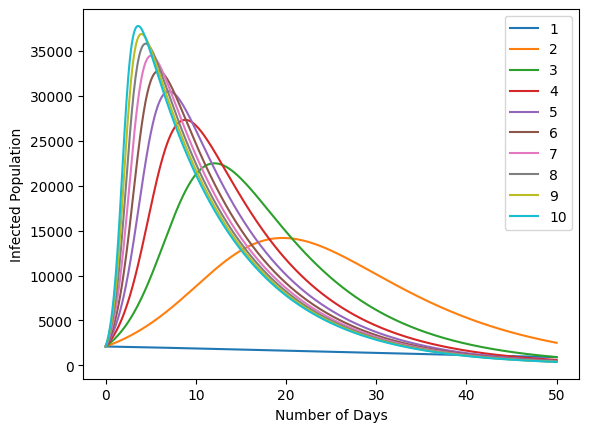

In [11]:
APLOT(0.000002, 10, 45400, 2100, 2500, 50)

3. The graph above represents the infected population for various transmission rates, ranging from 0.000002 to 0.00004. The first iteration of the while loop in the code starts with a transmission rate of 0.000002 and is relatively flat.  As the transmission rate increases with each iteration, each successive curve peaks at a higher infected population than the last.  

#### Plotting recovered population for APLOT

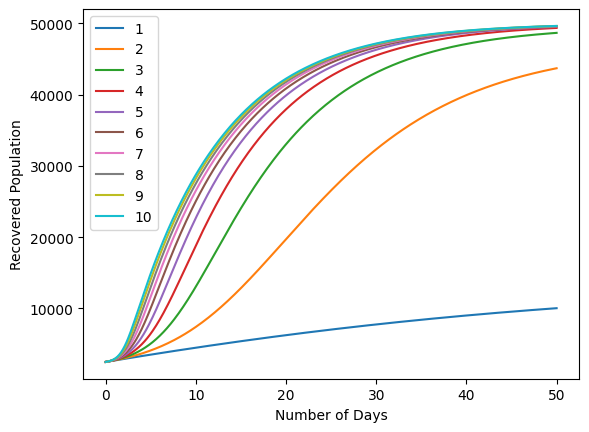

In [12]:
RAPLOT(0.000002, 10, 45400, 2100, 2500, 50)

4. I modified APLOT to generate the graph above, which shows the total recovered population for transmission rates ranging from 0.000002 to 0.00004. As the transmission rate 'a' grows, so too does the total recovered population.  Each infected person will recover from the illness, so the total recovered population after day 50 represents the total number of infections that occurred over the course of the illness.  We can also see that the recovered population grows more rapidly with higher rates of transmission.

#### LPLOT

In [40]:
import matplotlib.pyplot as plt

def LPLOT(trans_rate, rec_days, s_start, i_start, r_start, time):
    #Initializations
    t_initial, t_final = 0, time #start and end number of days
    t = t_initial #current day
    s, i, r = s_start, i_start, r_start #initial proportions for susceptible, infected, recovered, and death
    num_steps = t_final * 10 #10 steps for each day.
    a, b = trans_rate, rec_days #a (transmission coefficient/chance of infection) and b (recovery coefficient/days to recover).
    delta_t = (t_final - t_initial) / num_steps #time delta.

    #initialize lists for x and y axis to plot for SIR.
    x_axis = [t] 
    i_y_axis = [i]
    m = 1

    #loop through SIR calculations 10 times for each day that we're plotting.
    while(m <= 6):
        x_axis =[t]
        i_y_axis = [i]
        for k in range(num_steps):
            #calculate rate of change for SIR per step.
            s_prime = -a * s * i 
            i_prime = a * s * i - i / b
            r_prime = (i / b) 
    
            #calculate deltas for SIR per step.
            delta_s = s_prime * delta_t
            delta_i = i_prime * delta_t
            delta_r = r_prime * delta_t 
    
            #append deltas to x_axis(day) and y_axis for SIR.
            x_axis.append(t + delta_t)
            i_y_axis.append(i + delta_i)
    
            #set new initial values for next iteration.
            t = t + delta_t
            s = s + delta_s
            i = i + delta_i
            r = r + delta_r

        plt.plot(x_axis, i_y_axis, label = 'L%i' %m)
        m = m + 1
        b = b + 2
        x_axis.clear()
        i_y_axis.clear()
        t = t_initial
        s = s_start
        i = i_start
        r = r_start
            
    #x and y axes labels.
    plt.legend()
    plt.xlabel('Number of Days')
    plt.ylabel('Infected Population')

    return

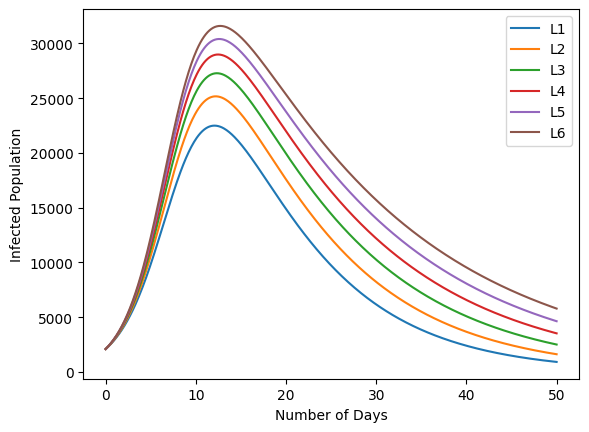

In [41]:
LPLOT(0.00001, 10, 45400, 2100, 2500, 50)

6. For this example, I started with the original data as input for SIRPLOT.  The length of recovery is represented by b and starts at 10 days.  This graph plots infected population for lengths of recovery from 10 days to 20 days, in 2 day increments.  We can see that a longer length of reecovery results in a larger infected population.

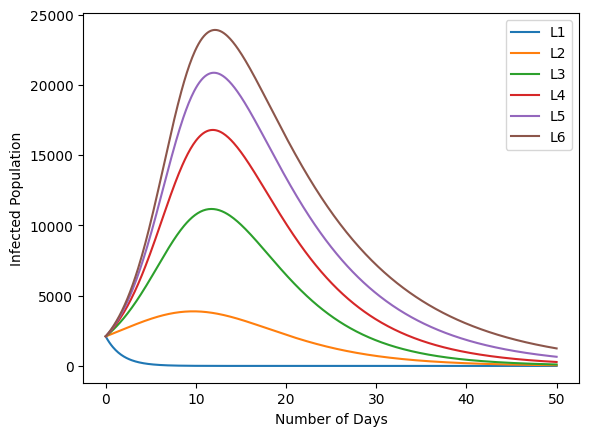

In [42]:
LPLOT(0.00001, 1, 45400, 2100, 2500, 50)

7. This plot shows the effects that a change in the length of recovery, ranging from 1 to 6 days,  with the remaining variables unchanged for the illness that we've been analyzing throughout this exploration of SIR.  Most interesting to me, is the idea that there is no growth in the infected population with a recovery period of 1 day.  As we progress from 1 to 6 days, the situation becomes much more grim, but this makes sense.  With longer recovery periods, there is a greater risk of exposure to the susceptible population so more people will fall ill.

In [49]:
import matplotlib.pyplot as plt

def RLPLOT(trans_rate, rec_days, s_start, i_start, r_start, time):
    #Initializations
    t_initial, t_final = 0, time #start and end number of days
    t = t_initial #current day
    s, i, r = s_start, i_start, r_start #initial proportions for susceptible, infected, recovered, and death
    num_steps = t_final * 10 #10 steps for each day.
    a, b = trans_rate, rec_days #a (transmission coefficient/chance of infection) and b (recovery coefficient/days to recover).
    delta_t = (t_final - t_initial) / num_steps #time delta.

    #initialize lists for x and y axis to plot for SIR.
    x_axis = [t] 
    r_y_axis = [i]
    m = 1

    #loop through SIR calculations 10 times for each day that we're plotting.
    while(m <= 6):
        x_axis =[t]
        r_y_axis = [i]
        for k in range(num_steps):
            #calculate rate of change for SIR per step.
            s_prime = -a * s * i 
            i_prime = a * s * i - i / b
            r_prime = (i / b) 
    
            #calculate deltas for SIR per step.
            delta_s = s_prime * delta_t
            delta_i = i_prime * delta_t
            delta_r = r_prime * delta_t 
    
            #append deltas to x_axis(day) and y_axis for SIR.
            x_axis.append(t + delta_t)
            r_y_axis.append(r + delta_r)
    
            #set new initial values for next iteration.
            t = t + delta_t
            s = s + delta_s
            i = i + delta_i
            r = r + delta_r

        plt.plot(x_axis, r_y_axis, label = 'L%i' %m)
        m = m + 1
        b = b + 2
        x_axis.clear()
        r_y_axis.clear()
        t = t_initial
        s = s_start
        i = i_start
        r = r_start
            
    #x and y axes labels.
    plt.legend()
    plt.xlabel('Number of Days')
    plt.ylabel('Recovered Population')

    return

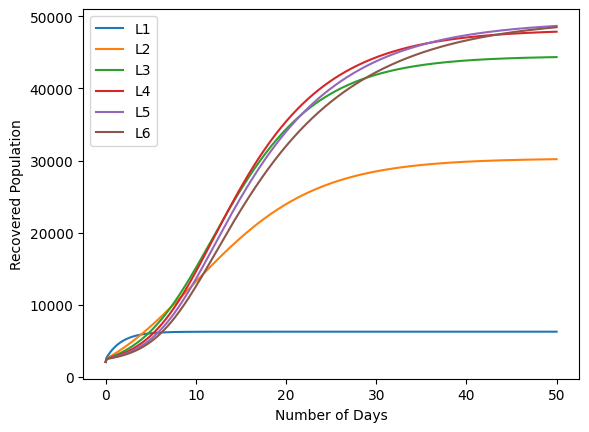

In [50]:
RLPLOT(0.00001, 1, 45400, 2100, 2500, 50)

8. Above is the representation of a recovered population, with each line representing lengths of illness 1-6 days.  What's most interesting to me again here, is the results of an illness length 1.  We started with a total of 2,100 people in the illness population.  It seems that not many more fell ill and only that initial population is ultimately represented int he recovered population. As expected, the total population that falls ill only grows with longer lengths of illness but the jump from 1 to 2 days and then from 2 to 3 days is drastic compared to the jump from 3-6 days.  This is an excellent representation of how illnesses can overcome a population at scale.

#### Initial SIRPLOT Revisited

In [51]:
import matplotlib.pyplot as plt

def SIRPLOT(trans_rate, rec_days, s_start, i_start, r_start, time):
    #Initializations
    t_initial, t_final = 0, time #start and end number of days
    t = t_initial #current day
    s, i, r = s_start, i_start, r_start #initial proportions for susceptible, infected, recovered, and death
    num_steps = t_final * 10 #10 steps for each day.
    a, b = trans_rate, rec_days #a (transmission coefficient/chance of infection) and b (recovery coefficient/days to recover).
    delta_t = (t_final - t_initial) / num_steps #time delta.

    #initialize lists for x and y axis to plot for SIR.
    x_axis = [t]
    s_y_axis = [s] 
    i_y_axis = [i]
    r_y_axis = [r]

    #loop through SIR calculations 10 times for each day that we're plotting.
    for k in range(num_steps):
        #calculate rate of change for SIR per step.
        s_prime = -a * s * i 
        i_prime = a * s * i - i / b
        r_prime = (i / b) 

        #calculate deltas for SIR per step.
        delta_s = s_prime * delta_t
        delta_i = i_prime * delta_t
        delta_r = r_prime * delta_t 

        #append deltas to x_axis(day) and y_axis for SIR.
        x_axis.append(t + delta_t)
        s_y_axis.append(s + delta_s)
        i_y_axis.append(i + delta_i)
        r_y_axis.append(r + delta_r)

        #set new initial values for next iteration.
        t = t + delta_t
        s = s + delta_s
        i = i + delta_i
        r = r + delta_r

    fig, ax = plt.subplots()

    #plot SIR with x_axis and y_axis for each.
    susceptible, = ax.plot(x_axis, s_y_axis, label = 'Susceptible')
    infected, = ax.plot(x_axis, i_y_axis, label = "Infected")
    recovered, = ax.plot(x_axis, r_y_axis, label = "Recovered")

    #legend for SIR.
    ax.legend(handles = [susceptible, infected, recovered])
    #x and y axes labels.

    ax.set_xlabel('Number of Days')
    ax.set_ylabel('Population')
    
    return

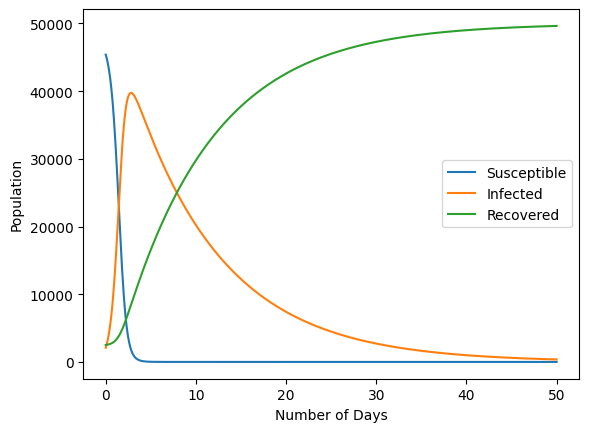

In [53]:
SIRPLOT(0.00005, 10, 45400, 2100, 2500, 50) ##Peaks soon, many infected.

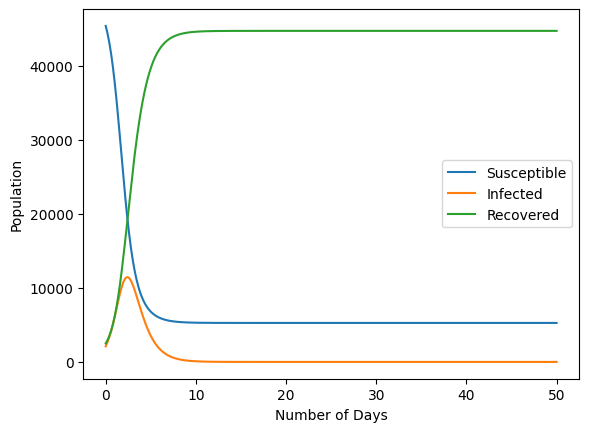

In [73]:
SIRPLOT(0.00005, 1, 45400, 2100, 2500, 50) 

10. There are two graphs above.  The first represents an epidemic that peaks quickly with many infected and the second represents an epidemic that peaks quickly with fewer infected.  A high rate of transmission is key to the peak occurring quickly, so i have used the same rate for both graphs.  The length of the illness is also a primary factor when determining how many fall ill.  In the first graph, the length of the illness is 10 days and the infected population peaks around 40,000 while the length of the illness in the second graph is only 1 day and the infected population peaks around 12,000.  

11. B seems to be the primary factor that affects the threshold value.  Greater lengths of illness results in more of the susceptible population falling ill.  With a lower length of illness, less of the susceptible population falls ill.  Intuitively, this would mean that illnesses with a lower length of illness would have a lower threshold for the illness to take hold of the susceptibel population.

12. In order to show the total new infected per day, we could modify the rate equation for the infected population so that the infected population that has recovered isn't subtracted out.  This graph would show the total infected population over the course of the pandemic. Dividing the number of total infected by day would show how many new infections occured per day.

#### Measles, Panic!  A Case Study.

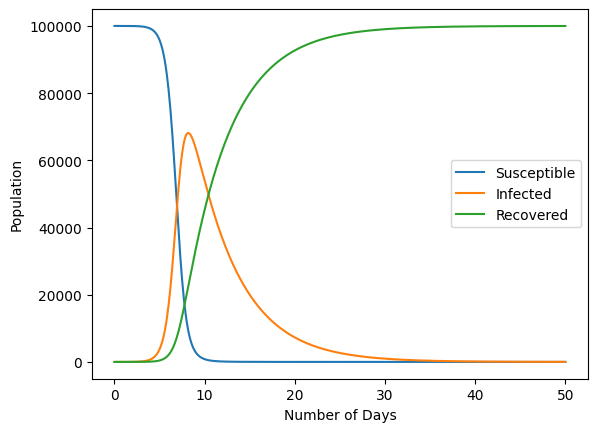

In [98]:
SIRPLOT(0.00002, 5, 100000, 1, 0, 50) ##Using SIRPLOT to provide a graph for this scenario.

The mayor could not have been more wrong.  This is going to be a huge problem.  In order to graph this scenario, I started with a susceptible population representative of the town's population of 100,000.  1 person was infected at the beginning of the pandemic, 0 had recovered, the length of illness is set to 5 days, and we have a transmission coefficient of 0.00002 to approximate the progression over the first 5 days.  The infected population grows rapidly soon after the mayor believes that this is nothing to worry about and peaks around day 9 with an infected population of around 70,000 people.  

This scenario highlights the importance of models like SIR.  Our decision making can be very shortsighted without this kind of analysis.  Ultimately, we can drive better societal outcomes if we are able to model the progression of events with serious implications such as disease, famine, climate, etc.

#### 1.2 #24, 25, 28 (Population, and Cooling)

24. Here, we are exploring why $k = \frac{persons per year}{persons}$. In this scenario, we are calculating the rate of change for a population that grows at a rate of 1500 per year.  The formula for $P^\prime$ is $P^\prime = kP$. k represents the population growth per person within the population, so we divide growth by the current population and then multiply that number by the current population.

 25a. General Equation: $P^\prime = kP$. Poland: $P^\prime = 0.009P$. Afghanistan: $A^\prime = 0.0216A$. <br>
 25b. Poland Net Growth Rate: $P^\prime = 0.009 \times 37,500,000 = 337,500$. Afghanistan Net Growth Rate: $P^\prime = 0.0216 \times 15,000,000 = 324,000$.  This shows is that a country with a larger per capita growth rate will not necessarily have a larger net growth rate. <br>
 25c. There are 525,600 minutes in a year (Credit: The musical RENT).  We can find how long it took for each population to grow by 1 person by dividing the number of minutes in a year by our net growth rates.  Poland: $\frac{525,500}{337,500}\approx1.56 minutes$. Afghanistan: $\frac{525,600}{324,000}\approx1.62 minutes$

#### 2.2 #1 - 7 (logistic equation) pp85-86


In [77]:
import matplotlib.pyplot as plt

def POPPLOT(growth_rate, p_start, time):
    #Initializations
    t_initial, t_final = 1985, time #start and end number of days
    t = t_initial #current day
    p = p_start #initial proportions for susceptible, infected, recovered, and death
    num_steps = t_final #10 steps for each day.
    k = growth_rate #a (transmission coefficient/chance of infection) and b (recovery coefficient/days to recover).
    delta_t = (t_final - t_initial) / num_steps #time delta.

    #initialize lists for x and y axis to plot for SIR.
    x_axis = [t]
    p_y_axis = [p]

    #loop through SIR calculations 10 times for each day that we're plotting.
    for i in range(num_steps):
        #calculate rate of change for SIR per step.
        p_prime = k*p 

        #calculate deltas for SIR per step.
        delta_p = p_prime * delta_t 

        #append deltas to x_axis(day) and y_axis for SIR.
        x_axis.append(t + delta_t)
        p_y_axis.append(p + delta_p)


        #set new initial values for next iteration.
        t = t + delta_t
        p = p + delta_p

    fig, ax = plt.subplots()

    #plot SIR with x_axis and y_axis for each.
    growth, = ax.plot(x_axis, p_y_axis, label = 'growth')

    #legend for SIR.
    ax.legend(handles = [growth])
    #x and y axes labels.

    ax.set_xlabel('Number of Years')
    ax.set_ylabel('Population (millions)')
    
    return

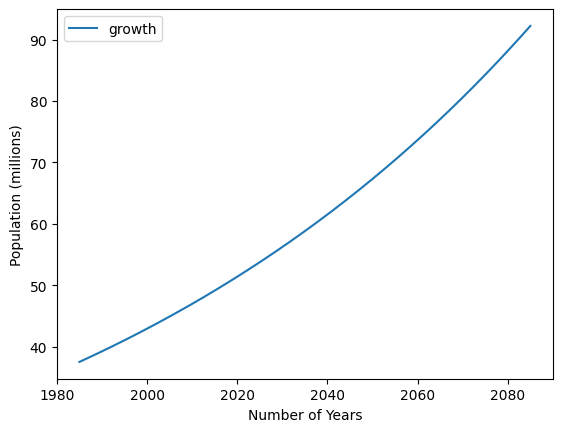

In [79]:
POPPLOT(0.009, 37.5, 2085) #Question 1a & 1b. The population will be a little over 90 million after 100 years. 

2. 

In [25]:
import matplotlib.pyplot as plt

def SEQUENCE(y_start):
    
    for k in range(1, 14):
        t_initial, t_final = 0, 37 
        t = t_initial 
        y = y_start 
        x_axis = [t]
        y_axis = [y]
        num_steps = pow(2, (k - 1))
        delta_t = (t_final - t_initial) / num_steps
        for i in range(num_steps):
            y_prime = .1 * y * (1 - y / 1000)
    
            #calculate deltas for SIR per step.
            delta_y = y_prime * delta_t
    
            #append deltas to x_axis(day) and y_axis for SIR.
            x_axis.append(t + delta_t)
            y_axis.append(y + delta_y)
    
    
            #set new initial values for next iteration.
            t = t + delta_t
            y = y + delta_y
            if(i == num_steps - 1):
                print(y)

        plt.plot(x_axis, y_axis)
        x_axis.clear()
        y_axis.clear()
    
    return

433.0
628.1338375
754.2733662444363
794.738393432439
807.9955037149149
813.3402899465265
815.7449036863974
816.8859307910178
817.4417688152433
817.7160955560412
817.8523701908152
817.9202864756393
817.9541895028831


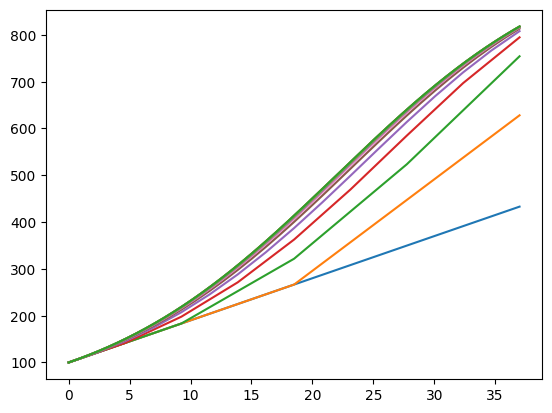

In [26]:
SEQUENCE(100)

2. In order to find y(37), I changed the t_final to 37 and printed the very last instance of y for each graph. The last iteration of the nested for loops will be most accurate, so we want to reference the very last print of y.  Therefore, $y(37)=817.95$, rounded to two decimal points.

In [31]:
import matplotlib.pyplot as plt

def SEQUENCE(y_start):
    
    for k in range(1, 14):
        t_initial, t_final = 0, 75 
        t = t_initial 
        y = y_start 
        x_axis = [t]
        y_axis = [y]
        num_steps = pow(2, (k - 1))
        delta_t = (t_final - t_initial) / num_steps
        for i in range(num_steps):
            y_prime = .1 * y * (1 - y / 1000)
    
            #calculate deltas for SIR per step.
            delta_y = y_prime * delta_t
    
            #append deltas to x_axis(day) and y_axis for SIR.
            x_axis.append(t + delta_t)
            y_axis.append(y + delta_y)
    
    
            #set new initial values for next iteration.
            t = t + delta_t
            y = y + delta_y

        plt.plot(x_axis, y_axis)
        x_axis.clear()
        y_axis.clear()
    
    return

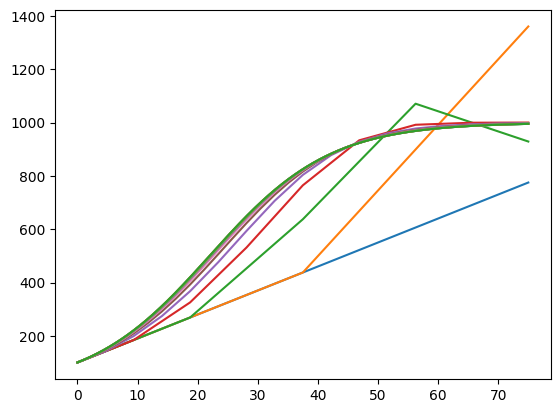

In [32]:
SEQUENCE(100)

Above is the original graph for SEQUENCE.

3a. As t gets large, the accuracy of the plots for y decreases for the graphs with fewer iterations of the rate equation.  As we increase the number of iterations for the delta_y calculation by increasing num_steps in the function, the graph for y becomes more accurate. <br> 

In [39]:
import matplotlib.pyplot as plt

def SEQUENCEMOD(y_start):
    
    for k in range(1, 14):
        t_initial, t_final = 0, 75 
        t = t_initial 
        y = y_start 
        x_axis = [t]
        y_axis = [y]
        num_steps = 50 #pow(2, (k - 1))
        delta_t = (t_final - t_initial) / num_steps
        for i in range(num_steps):
            y_prime = .1 * y * (1 - y / 1000)
    
            #calculate deltas for SIR per step.
            delta_y = y_prime * delta_t
    
            #append deltas to x_axis(day) and y_axis for SIR.
            x_axis.append(t + delta_t)
            y_axis.append(y + delta_y)
    
    
            #set new initial values for next iteration.
            t = t + delta_t
            y = y + delta_y

        plt.plot(x_axis, y_axis)
        x_axis.clear()
        y_axis.clear()
    
    return

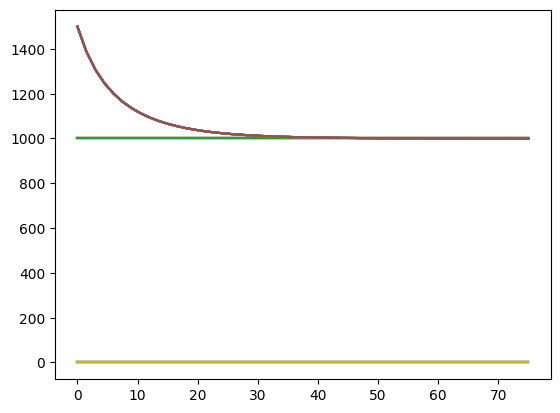

In [47]:
SEQUENCEMOD(1000) #y(0) == 1000
SEQUENCEMOD(1500) #y(0) == 1500
SEQUENCEMOD(0) #y(0) == 0

3b. Starting with y(1000) is graphed in green above.  When you plug this into the rate equation, the solution for y prime is $y^\prime=.1*1000*(1-\frac{1000}{1000})=.1*1000*(0)=0$ y never grows because the rate of change is always 0. <br>
3c. Starting with y(1500) results in a negative rate of change, so the population decreases over time.  This is graphed in brown above.<br>
3d. Starting with y(0) also results in a rate of change of 0, so y never grows.<br>
3e. The carrying capacity is like filling a balloon with water.  If you don't fill the balloon, it maintains it's deflated shape and does not change.  If you fill the balloon with just the right amount of water and tie it off, it maintains it's filled shape in perfect homeostasis.  If you overfill the balloon, it pops and the amount of water in the balloon rapidly decreases.

In [48]:
import matplotlib.pyplot as plt

def SEQUENCEMOD2(y_start, denom):
    
    for k in range(1, 14):
        t_initial, t_final = 0, 75 
        t = t_initial 
        y = y_start 
        x_axis = [t]
        y_axis = [y]
        num_steps = 50 #pow(2, (k - 1))
        delta_t = (t_final - t_initial) / num_steps
        for i in range(num_steps):
            y_prime = .1 * y * (1 - y / denom)
    
            #calculate deltas for SIR per step.
            delta_y = y_prime * delta_t
    
            #append deltas to x_axis(day) and y_axis for SIR.
            x_axis.append(t + delta_t)
            y_axis.append(y + delta_y)
    
    
            #set new initial values for next iteration.
            t = t + delta_t
            y = y + delta_y

        plt.plot(x_axis, y_axis)
        x_axis.clear()
        y_axis.clear()
    
    return

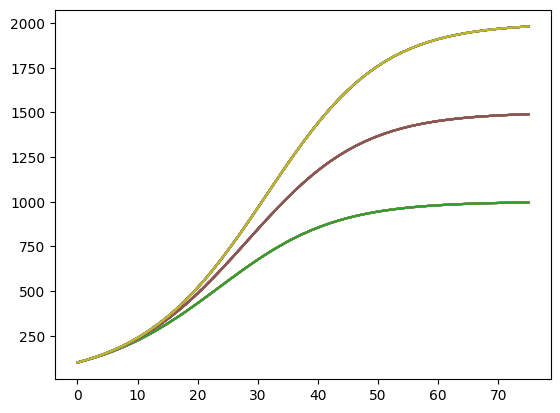

In [49]:
SEQUENCEMOD2(100, 1000) #original carrying capacity
SEQUENCEMOD2(100, 1500) #carrying capacity increased by 500
SEQUENCEMOD2(100, 2000) #carrying capacity increased by 1000.

4. The graph above shows the results of SEQUENCE with a stepwise increase of the carrying capacity by 500.  As the carrying capacity increases, so too does the rate of change for y.  A larger carrying capacity will result in an overall larger population across the same period of time. 

In [50]:
import matplotlib.pyplot as plt

def SEQUENCEMOD3(y_start, denom, front):
    
    for k in range(1, 14):
        t_initial, t_final = 0, 75 
        t = t_initial 
        y = y_start 
        x_axis = [t]
        y_axis = [y]
        num_steps = 50 #pow(2, (k - 1))
        delta_t = (t_final - t_initial) / num_steps
        for i in range(num_steps):
            y_prime = front * y * (1 - y / denom)
    
            #calculate deltas for SIR per step.
            delta_y = y_prime * delta_t
    
            #append deltas to x_axis(day) and y_axis for SIR.
            x_axis.append(t + delta_t)
            y_axis.append(y + delta_y)
    
    
            #set new initial values for next iteration.
            t = t + delta_t
            y = y + delta_y

        plt.plot(x_axis, y_axis)
        x_axis.clear()
        y_axis.clear()
    
    return

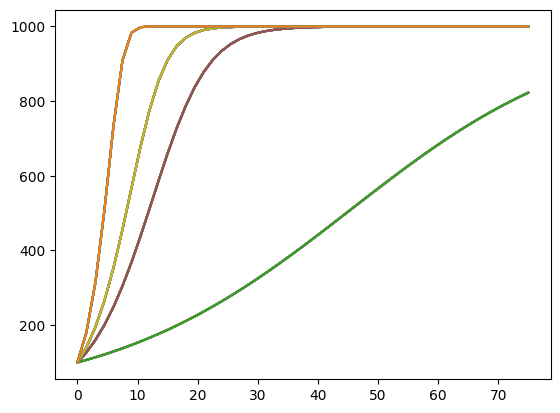

In [51]:
SEQUENCEMOD3(100, 1000, .05)
SEQUENCEMOD3(100, 1000, .2)
SEQUENCEMOD3(100, 1000, .3)
SEQUENCEMOD3(100, 1000, .6)

5. The graph above shows the results of SEQUENCE at varying intervals for the constant that was originally .1 in the rate equation (the variable front in the code).  As we can see, as this number gets larger, the population growth (y) occurs more rapidly.  

In [81]:
import matplotlib.pyplot as plt

def SEQUENCEMOD4(y_start, denom, final):
    
    for k in range(1, 14):
        t_initial, t_final = 0, final 
        t = t_initial 
        y = y_start 
        x_axis = [t]
        y_axis = [y]
        num_steps = 50 #pow(2, (k - 1))
        delta_t = (t_final - t_initial) / num_steps
        for i in range(num_steps):
            y_prime = denom * y * (1 - y / 1000)
    

            delta_y = y_prime * delta_t
    

            x_axis.append(t + delta_t)
            y_axis.append(y + delta_y)
    
    

            t = t + delta_t
            y = y + delta_y
            if(i == num_steps - 1):
                print(y)
            

        plt.plot(x_axis, y_axis)
        x_axis.clear()
        y_axis.clear()
    
    return

900.0269547242474
900.0269547242474
900.0269547242474
900.0269547242474
900.0269547242474
900.0269547242474
900.0269547242474
900.0269547242474
900.0269547242474
900.0269547242474
900.0269547242474
900.0269547242474
900.0269547242474


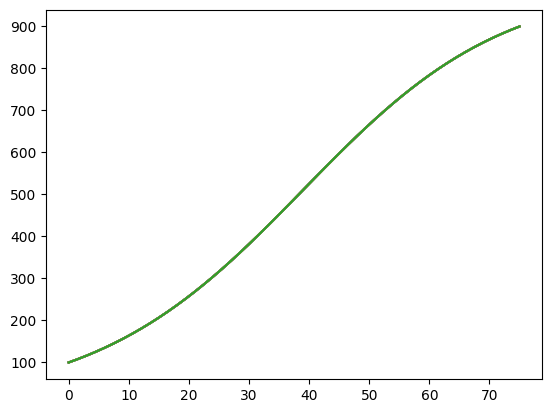

In [82]:
SEQUENCEMOD4(100, .0586, 75)

6. Above is the graphical representation of y(t) = 900.

900.4923981399481
900.4923981399481
900.4923981399481
900.4923981399481
900.4923981399481
900.4923981399481
900.4923981399481
900.4923981399481
900.4923981399481
900.4923981399481
900.4923981399481
900.4923981399481
900.4923981399481


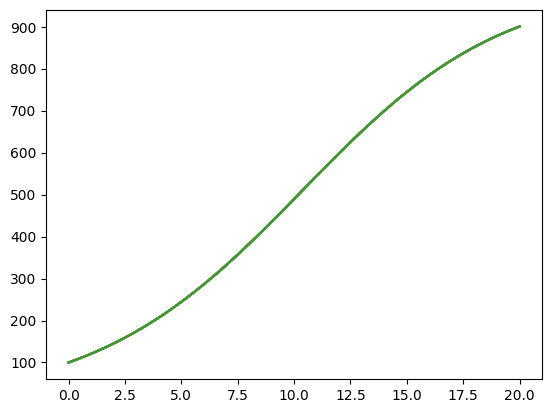

In [89]:
SEQUENCEMOD4(100, 0.22, 20)

7. Above is the graphical representation of $t(20)=900$.  With a starting population of 100 and a denominator of 1000, our constant value is 0.22.

#### 2.3 - Code for LENGTH

In [99]:
import math
def fnf(x):
    return x**2
def LENGTH(xstart, xfinish, steps):
    xinitial = xstart
    xfinal = xfinish
    num_steps = steps
    delta_x = (xfinal - xinitial) / num_steps
    total = 0

    for k in range(1, num_steps + 1):
        xl = xinitial + (k - 1) * delta_x
        xr = xinitial + k * delta_x
        yl = fnf(xl)
        yr = fnf(xr)
        segment = math.sqrt((xr - xl)**2 + (yr - yl)**2)
        total += segment
        print(k, segment)
    print(steps, total)

    return


In [100]:
LENGTH(0, 1, 2)

1 0.5590169943749475
2 0.9013878188659973
2 1.4604048132409448


#### 2.3 # 1-10

2. See above code and result of running LENGTH with original data in the textbook.  This is correct.
3. The helper function above, fnf(x), is the function for $f(x)=x^2$.  The helper function is called within the for loop, to declare the variables yl and yr.  num_steps indicates the number of segments to be measured, 2 in this case.
4. left endpoint: xl, yl variables.  right endpoint: xr, yr variables.
5. The length of the k'th segment is calculated on the line where the variable 'segment' is declared with each iteration of the for loop.

In [105]:
import math
def fnf(x):
    return x**2
def LENGTHMOD(xstart, xfinish, steps):
    xinitial = xstart
    xfinal = xfinish
    num_steps = steps
    delta_x = (xfinal - xinitial) / num_steps
    total = 0

    for k in range(1, num_steps + 1):
        xl = xinitial + (k - 1) * delta_x
        xr = xinitial + k * delta_x
        yl = fnf(xl)
        yr = fnf(xr)
        segment = math.sqrt((xr - xl)**2 + (yr - yl)**2)
        total += segment
        #print(k, segment)
    print(steps, total)

    return


In [106]:
LENGTHMOD(0, 1, 20) #6. THE ESTIMATED VALUE IS 1.4787...

20 1.4787565120290738


In [109]:
LENGTHMOD(0, 1, 2) #7.  See below for results, they match the book.
LENGTHMOD(0, 1, 20)
LENGTHMOD(0, 1, 200)
LENGTHMOD(0, 1, 2000)
LENGTHMOD(0, 1, 20000)
LENGTHMOD(0, 1, 200000)
LENGTHMOD(0, 1, 2000000)

2 1.4604048132409448
20 1.4787565120290738
200 1.4789409941539637
2000 1.4789428389106982
20000 1.4789428573582588
200000 1.4789428575427506
2000000 1.4789428575446022
